In [32]:
import pandas as pd
import numpy as np

### Introduction to regression

In [33]:
diabetes = pd.read_csv("diabetes_clean.csv")
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
X = diabetes.drop("glucose", axis=1).values
y = diabetes['glucose'].values
X.shape

(768, 8)

In [35]:
x_bmi = X[:,4]
print(x_bmi.shape)
x_bmi = x_bmi.reshape(-1,1)
print(x_bmi.shape)

(768,)
(768, 1)


Text(0.5, 0, 'Body mass index')

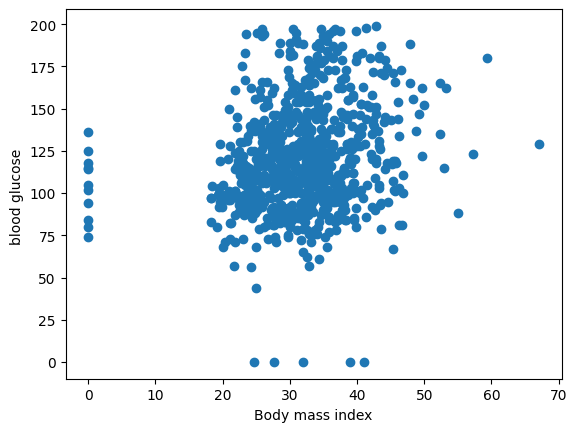

In [36]:
import matplotlib.pyplot as plt

plt.scatter(x_bmi, y)
plt.ylabel("blood glucose ")
plt.xlabel("Body mass index")

Text(0.5, 0, 'Body mass index')

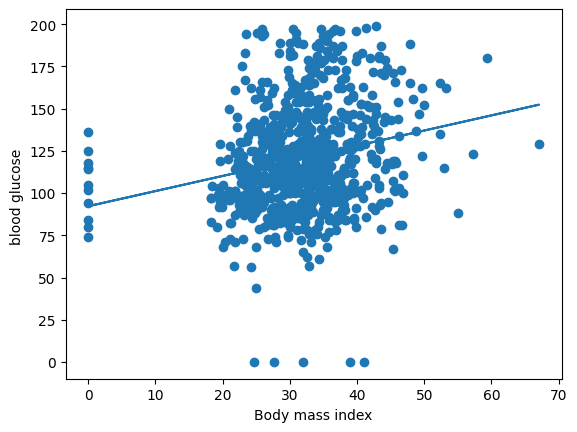

In [37]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_bmi, y)

predictions = reg.predict(x_bmi)

plt.scatter(x_bmi, y)
plt.plot(x_bmi, predictions)
plt.ylabel("blood glucose ")
plt.xlabel("Body mass index")

### The basic of linear regression

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

y_pred = reg_all.predict(X_test)

print("Train score:",reg_all.score(X_train, y_train)) #R-squared
print("Test score:",reg_all.score(X_test, y_test)) #R-squared


Train score: 0.3617295663010123
Test score: 0.28280468810375115


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse) #root mean square error
print("RMSE:", rmse)

MSE: 693.872492922376
RMSE: 26.341459582232265


### Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=6, shuffle=True, random_state=42)
reg = LinearRegression()print("Test score:",reg_all.score(X_test, y_test)) #R-squared


array([0.26207548, 0.28228176, 0.41203082, 0.23785884, 0.41634629,
       0.30398869])

### Regularized regression
* Large coefficient can lead to overfitting
* Regularization: Penalize large coefficient


### Ridge regression
* Ridge penalizes large positive or negative coefficient
* alpha: hypaparameter of ridge
* alpha = 0 = OLS (lead to overfitting)
* large alpha leads to underfitting

In [ ]:
from sklearn.linear_model import Ridge

scores = []
for alpha in [0.1, 1.0, 10, 100, 1000]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)

    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))
print(scores)

[0.2828466623222221, 0.28320633574804766, 0.2853000732200006, 0.26423984812668133, 0.19292424694100963]


### Lasso regression

In [ ]:
from sklearn.linear_model import Lasso

scores = []
for alpha in [0.1, 1.0, 10, 100, 1000]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)

    y_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))
print(scores)

[0.28575325694826237, 0.29795609755827845, 0.17989838789273893, 0.10438614467572016, 0.04044144424693341]
